In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

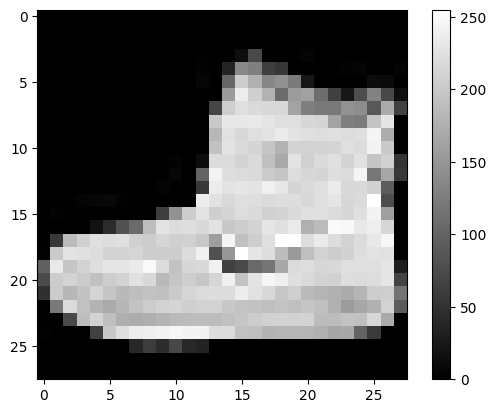

In [4]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
labels = [
    "T-shirt/top",  
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

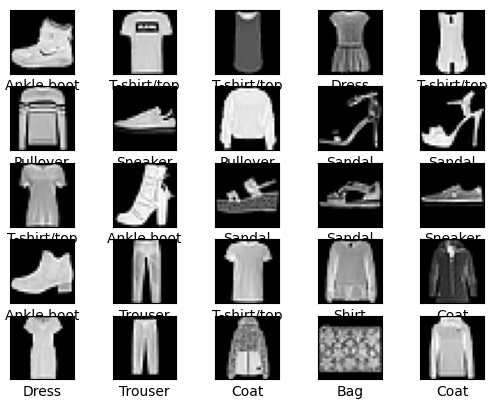

In [7]:
plt.figure()
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(labels[train_labels[i]])

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10 , activation='softmax')
])

d:\programs\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8209 - loss: 0.5018
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8652 - loss: 0.3687
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8781 - loss: 0.3313
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8833 - loss: 0.3115
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8906 - loss: 0.2934
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8955 - loss: 0.2787
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9012 - loss: 0.2657
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9046 - loss: 0.2547
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9074 - loss: 0.2450
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9122 - loss: 0.2353


In [11]:
# # measure train time for more epochs
# # model.history = model.fit(train_images, train_labels, epochs=50)
# with tf.device('/GPU:0'):
#     model.history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9137 - loss: 0.2261
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9154 - loss: 0.2216
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9205 - loss: 0.2128
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9219 - loss: 0.2062
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9242 - loss: 0.2006
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9251 - loss: 0.1966
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9277 - loss: 0.1892
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9294 - loss: 0.1857
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9311 - loss: 0.1812
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9335 - loss: 0.1758
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9342 - loss: 0.1712
Epoch 12/50
1875/1875 ━━━━━━━━

In [12]:
# model validation and evaluation code would go here
acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", acc[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8890 - loss: 0.6330
Test accuracy: 0.8889999985694885


In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8890 - loss: 0.6330

Test accuracy: 0.8889999985694885


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


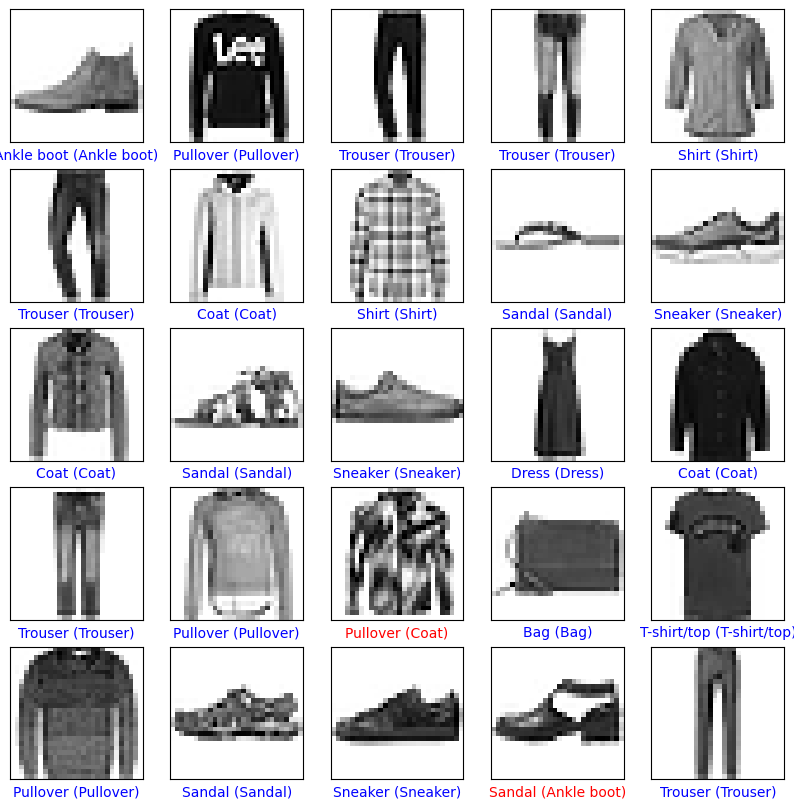

In [14]:
plt.figure(figsize=(10,10))
predictions = model.predict(test_images)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(labels[predicted_label],
                                labels[true_label]),
                                color=color)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.82      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.80      0.83      0.81      1000
       Dress       0.90      0.88      0.89      1000
        Coat       0.83      0.80      0.81      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.70      0.74      0.72      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.94      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[818   4  18  21   5   2 128   0   4   0]
 [  2 980   3   8   3   0   4   0   0   0]
 [ 14   0 826   9  62   0  86   0   3   0]
 [ 19  16  16 880  41   0  25   0   3   0]
 [  1   0 103  21 795   0  77   0   3   0]
 [  1  

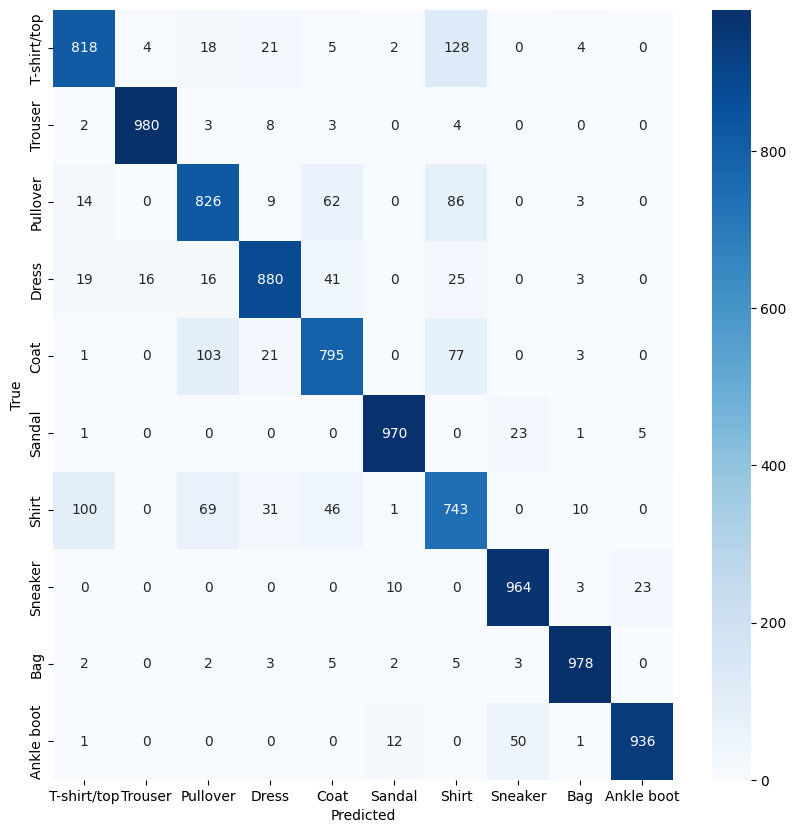

In [15]:
# precision and recall calculation code would go here
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(predictions, axis=1)
print(classification_report(test_labels, y_pred, target_names=labels))
cm = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()